# Examples for pyoculus
## 1. Import pyoculus and the solvers

In [1]:
import numpy as np
from pyoculus.problems import TwoWaves
from pyoculus.problems import ToroidalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint
                            #   LyapunovExponent, FluxSurfaceGR)

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

## 2. Set up the problem we want to compute.
This can be a SPEC equilibrium or anything. Here as an example, we use the perturbed slab model Stuart uses for his "Destruction" paper

In [3]:
Mag = TwoWaves(k=0.0018)

In [4]:
section = ToroidalBfieldSection(Mag, rtol=1e-9)

## 3. Poincare Plot

In [5]:
pplot = PoincarePlot.with_linspace(section, [0.58, 0], [0.66, 0], 50)

In [6]:
pplot.compute(npts = 500, compute_iota=True)

array([[[0.58      , 0.        ],
        [0.58209783, 3.64978497],
        [0.57800252, 1.01809958],
        ...,
        [0.59036354, 3.29490727],
        [0.57940159, 0.69880864],
        [0.55973835, 4.272477  ]],

       [[0.58163265, 0.        ],
        [0.58356942, 3.65960559],
        [0.57983741, 1.03776976],
        ...,
        [0.57157132, 2.34333598],
        [0.58267959, 5.96253907],
        [0.59390554, 3.38320079]],

       [[0.58326531, 0.        ],
        [0.58503907, 3.66942341],
        [0.581668  , 1.05740773],
        ...,
        [0.58582019, 5.35415289],
        [0.59233933, 2.7815531 ],
        [0.58391239, 0.19810017]],

       ...,

       [[0.65673469, 0.        ],
        [0.64997156, 4.10963544],
        [0.65181357, 1.90452938],
        ...,
        [0.68720019, 0.07915559],
        [0.67411195, 4.36046196],
        [0.67148001, 2.29444718]],

       [[0.65836735, 0.        ],
        [0.65141004, 4.11941565],
        [0.65308578, 1.92278823],
        .

(0.58, 0.66)

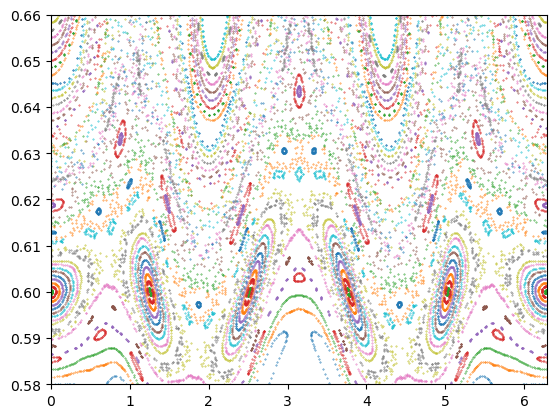

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for hit in pplot._hits:
    ax.scatter(hit[:, 1], hit[:, 0], marker='.', s=0.5)
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0.58, 0.66)

In [8]:
pplot.compute_iota()

(array([[0.58      , 0.        ],
        [0.58163265, 0.        ],
        [0.58326531, 0.        ],
        [0.58489796, 0.        ],
        [0.58653061, 0.        ],
        [0.58816327, 0.        ],
        [0.58979592, 0.        ],
        [0.59142857, 0.        ],
        [0.59306122, 0.        ],
        [0.59469388, 0.        ],
        [0.59632653, 0.        ],
        [0.59795918, 0.        ],
        [0.59959184, 0.        ],
        [0.60122449, 0.        ],
        [0.60285714, 0.        ],
        [0.6044898 , 0.        ],
        [0.60612245, 0.        ],
        [0.6077551 , 0.        ],
        [0.60938776, 0.        ],
        [0.61102041, 0.        ],
        [0.61265306, 0.        ],
        [0.61428571, 0.        ],
        [0.61591837, 0.        ],
        [0.61755102, 0.        ],
        [0.61918367, 0.        ],
        [0.62081633, 0.        ],
        [0.62244898, 0.        ],
        [0.62408163, 0.        ],
        [0.62571429, 0.        ],
        [0.627

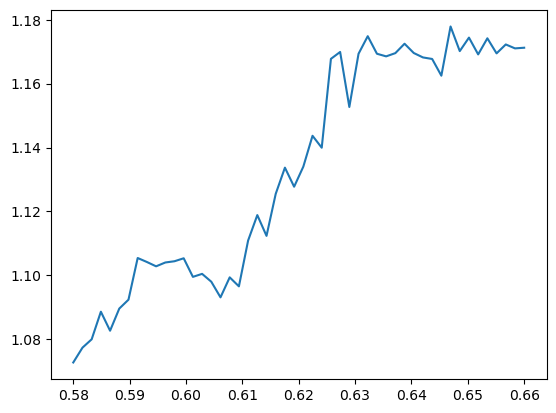

In [9]:
plt.plot(np.linalg.norm(pplot.xs, axis=1), pplot.iota)

## 4. Finding fixed points and plot them

In [10]:
fp58 = FixedPoint(section)
fp35 = FixedPoint(section)

# fp58.compute(guess=[5/8,0],pp=5,qq=8,sbegin=0.5,send=0.7)
# fp35.compute(guess=[3/5,0],pp=3,qq=5,sbegin=0.5,send=0.7)

In [17]:
# fp58.find_with_iota(5, 8, guess=[5/8, 0], x_axis=np.array([0, 0]))
fp58.find_with_iota(5, 8, guess=[0.635, 0.9], x_axis=np.array([0, 0]))

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.635 0.9  ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [0.63302114 0.90206372]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [-0.00181791 -0.02269448]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.63318209 0.87730552]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.63318209 0.87730552]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_winding : [0.63322608 0.87924693]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step: [-4.10201650e-05  6.47781925e-04]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_new: [0.63314107 0.87795331]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [0.63314107 0.87795331]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_winding : [0.63314111 0.87795369]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step: [2.13749165e-08 4.90894112e-07]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_new: [0.63314109 0.8779538 ]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [0.63314109 0.8779538 ]
IN

In [16]:
fp35.find_with_iota(3, 5, guess=[0.6, 1.05], x_axis=np.array([0, 0]))

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.6  1.05]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [0.60776146 1.02115123]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [ 0.09416685 -0.97680932]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.69416685 0.07319068]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.69416685 0.07319068]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_winding : [0.65010688 2.30235105]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step: [-0.07849677  0.64200703]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_new: [0.61567007 0.71519771]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [0.61567007 0.71519771]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_winding : [0.62151668 1.03368807]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step: [-0.01358947 -0.50531967]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_new: [0.60208061 0.20987804]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [0.60208061 0.20987804]
INFO:pyoculus.solv

In [24]:
fp35.coords

array([[0.6       , 6.28318531],
       [0.6       , 3.76991118],
       [0.6       , 1.25663706],
       [0.6       , 5.02654825],
       [0.6       , 2.51327412],
       [0.6       , 6.28318531]])

In [25]:
fp35.coords[0,1], 2*np.pi

(6.283185307170965, 6.283185307179586)

## 5. Greene's Residue and finding flux surfaces

In [26]:
iota = 1/((np.sqrt(5) + 1) / 2)

In [ ]:
flux_surface = FluxSurfaceGR(section)

fsresult = flux_surface.compute(iota, n_expand=9, fixed_point_left=fp35, fixed_point_right=fp58)
pplot.plot(ylim=[0.58,0.66],s=0.5)

flux_surface.plot()
flux_surface.plot_residue()

## 6. Compute the Lyapunov Exponent

In [ ]:
# set up the integrator
iparams = dict()
iparams['rtol'] = 1e-10

pparams = dict()
pparams['Nfp'] = 1
pparams['nPpts'] = 4000

le = LyapunovExponent(ps,pparams,integrator_params=iparams)

In [ ]:
le_result=le.compute(0,[result58.s[0],result58.y[0]])
le.plot()
le_result=le.compute(0,[0.63,0])
le.plot()

## 7. QFM

In [ ]:
qfm = pyoculus.solvers.QFM(ps, {"pqNtor":8, "pqMpol":24, "nfft_multiplier":2})

plist = np.array([5,13, 8,11,3])
qlist = np.array([8,21,13,18,5])
sguess= np.ones(qlist.size) * 0.6
surfaces = qfm.construct_qfms(plist,qlist, sguesslist=sguess, bounding_surfaces=None)

In [ ]:
pplot.plot(ylim=[0.58,0.66],s=0.5)
surfaces.plot(zeta=0,linewidth=1)
fp35.plot()
fp58.plot()